In [1]:
import numpy as np
import uproot as ur
import matplotlib.pyplot as plt
import numba as nb
import pandas as pd

from numba import njit

In [2]:
t_hk_obox = ur.open("../data/Allaux_Bfield.root:t_hk_obox")
print(t_hk_obox.show())
t_hk_obox_dict = t_hk_obox.arrays(["saa", 
                  "fe_temp",
                  "glon", 
                  "glat",
                  "tunix",
                  "fe_cosmic",
                  "fe_rate"], library="np")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
odd_index            | int32_t                  | AsDtype('>i4')
even_index           | int32_t                  | AsDtype('>i4')
odd_is_bad           | int32_t                  | AsDtype('>i4')
even_is_bad          | int32_t                  | AsDtype('>i4')
obox_is_bad          | int32_t                  | AsDtype('>i4')
packet_num           | uint16_t                 | AsDtype('>u2')
timestamp            | uint32_t                 | AsDtype('>u4')
obox_mode            | uint8_t                  | AsDtype('uint8')
cpu_status           | uint16_t                 | AsDtype('>u2')
trig_status          | uint8_t                  | AsDtype('uint8')
comm_status          | uint8_t                  | AsDtype('uint8')
ct_temp              | float                    | AsDtype('>f4')
chain_temp           | float                    | As

In [30]:
tunix = t_hk_obox_dict["tunix"]
sum_fe_rate = np.sum(t_hk_obox_dict["fe_rate"], axis=1)

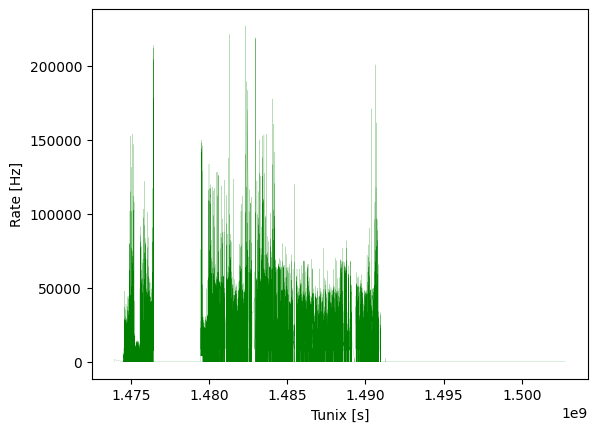

In [38]:
plt.plot(tunix, sum_fe_rate, 'g', linewidth=0.1)
plt.xlabel("Tunix [s]")
plt.ylabel("Rate [Hz]")  # nb. photons per seconds
plt.show()

In [40]:
tunix_shifted = tunix - tunix.min()
bins = np.arange(0, t_shifted.max()+2, 2)

indices_digitized = np.digitize(tunix_shifted, bins)
uniques_idx, counts_idx = np.unique(indices_digitized, return_counts=True)

t = bins[indices_digitized]

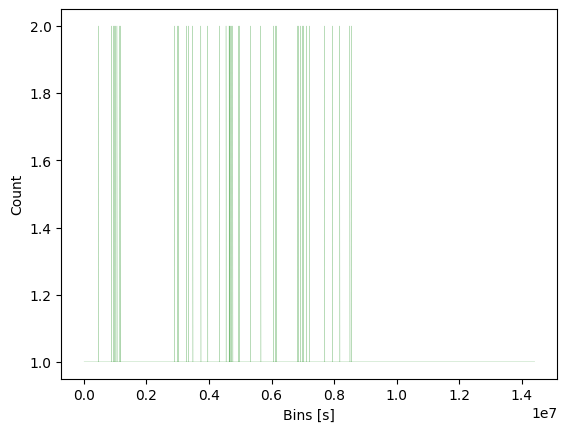

In [53]:
plt.plot(uniques_idx, counts, 'g', linewidth=0.1)
plt.xlabel("Bins [s]")
plt.ylabel("Count")  # nb. data falling into bin
plt.show()

There are sometimes two data points in a bin, we can average the data falling into each bin (profile hist).

In [54]:
# First column is the quantized time, second is the 'average' rate within the bin
light_curve = np.array(pd.DataFrame(np.vstack([t, y, indices_digitized]).T, 
                                    columns=["t", "y", "idx"]).groupby("idx").mean())

In [56]:
t, y = light_curve.T

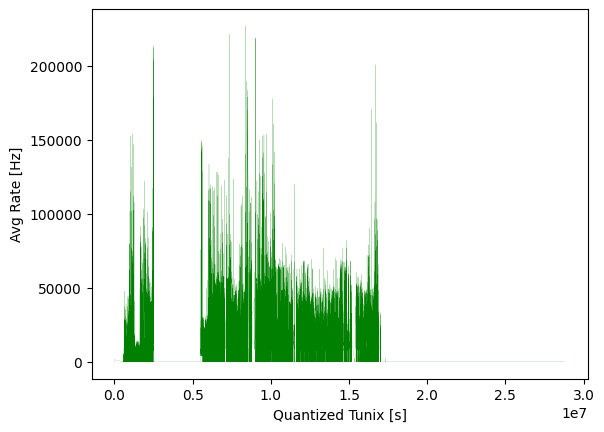

In [58]:
plt.plot(t, y, 'g', linewidth=0.1)
plt.xlabel("Quantized Tunix [s]")
plt.ylabel("Avg Rate [Hz]")  # nb. photons per seconds (averaged over each bin)
plt.show()

In [22]:
t_shifted.size

6210975